# Hate Speech Detection Using Machine Learning

## Load Libraries

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk #Natural Language ToolKIt
import string
import seaborn as sns
import re #Regular Expression
from PIL import Image
%matplotlib inline 

## Loading the Data

In [3]:
data = pd.read_csv(r"C:\Users\User\Desktop\Project\labeled_data.csv")
# put 'r' before the path string to address any special characters in the path, such as '\'.

In [4]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
# Removing unnecessary column
data = data.drop(data.columns[[0]],axis = 1)

In [6]:
data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
# columns/column names in dataframe
data.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [7]:
# Datatypes of the dataframe columns
data.dtypes

count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [8]:
# summary of statistics pertaining to dataframe columns
data.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


### Columns description:
Unnamed: 0 = index column

count = number of CrowdFlower(CF) users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of CF users.

0 - hate speech<br>
1 - offensive  language<br>
2 - neither

tweet = raw tweet text

In [9]:
# shape of the data(i.e.(no. of rows, no. of columns))
data.shape

(24783, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


<AxesSubplot:>

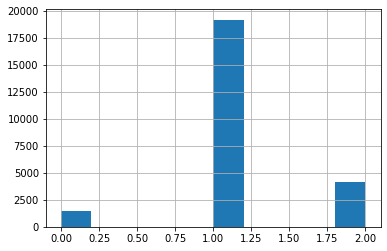

In [11]:
# Histogram of class data
data['class'].hist()

This histogram shows the imbalanced nature of the task - most tweets containing "hate" words as defined by Hatebase were only considered to be offensive by the CF coders. More tweets were considered to be neither hate speech nor offensive language than were considered hate speech.

<AxesSubplot:xlabel='class', ylabel='count'>

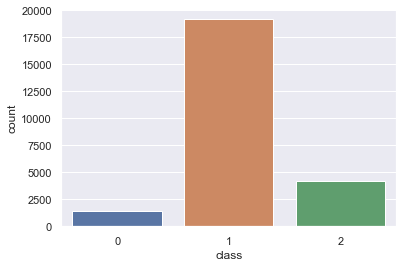

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(x='class',data=data)

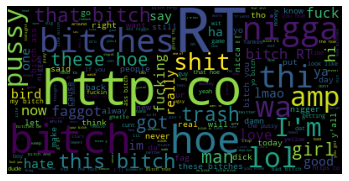

In [15]:
from wordcloud import WordCloud
tweet_text=" ".join(review for review in data.tweet)
wordcloud=WordCloud(background_color="black").generate(tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data Preprocessing

Most of the tweets data are cleaned by the following steps.

1. Remove URLs, Mentions
2. Remove Punctuations
3. Tokenization - Converting a sentence into a list of words
4. Remove stopwords - words which does not add much meaning to a sentence
5. Lammetization/stemming - Transforming any form of word to its root word


In [16]:
data.tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [17]:
df=pd.DataFrame(data[['class','tweet']])

In [18]:
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [19]:
df.isna().sum()

class    0
tweet    0
dtype: int64

In [19]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

### 1. Removing URLs, mentions from tweets data

In [20]:
def gms(tweet):
    url_regex=('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mentions_regex='@[\w\-]+'
    space_regex='\s+'
    
    parsed_tweet=re.sub(url_regex,'',tweet)
    parsed_tweet=re.sub(mentions_regex,'',parsed_tweet)
    parsed_tweet=re.sub(space_regex,' ',parsed_tweet)
    return parsed_tweet

In [21]:
df['tweet1']=df['tweet'].apply(lambda x:gms(x)) # Lambda - alternative to 'for' loop which uses less effort

In [22]:
df # Result of this step stored in tweet1 column

,class,tweet,tweet1
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf***in lie &#8220;: right! His TL...
24779,2,"you've gone and broke the wrong heart baby, an...","you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


### 2. Removing Punctuations

In [23]:
#Punctuations in string package
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation(text):
    text="".join([char for char in text if char not in string.punctuation])
    text=re.sub('[0-9]+','',text)
    return text
df['tweet2']=df['tweet1'].apply(lambda x: remove_punctuation(x.lower())).str.strip()
df.head(10) # Result of this step is stored in tweet2 column

,class,tweet,tweet1,tweet2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,rt as a woman you shouldnt complain about cle...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,rt dawg rt you ever fuck a bitch and she star...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,rt she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,rt the shit you hear about me might be true o...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",the shit just blows meclaim you so faithful an...
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano...",i can not just sit up and hate on another bitc...
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...,cause im tired of you big bitches coming for u...
8,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats ...
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",hobbies include fighting mariam bitch


### 3. Tokenization

In [25]:
def tokenization(text):
    text=re.split('\W+',text)
    return text
df['tweet3']=df['tweet2'].apply(lambda x: tokenization(x))
df.head(10)

,class,tweet,tweet1,tweet2,tweet3
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,rt as a woman you shouldnt complain about cle...,"[rt, as, a, woman, you, shouldnt, complain, ab..."
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,"[rt, boy, dats, coldtyga, dwn, bad, for, cuffi..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,rt dawg rt you ever fuck a bitch and she star...,"[rt, dawg, rt, you, ever, fuck, a, bitch, and,..."
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,rt she look like a tranny,"[rt, she, look, like, a, tranny]"
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,rt the shit you hear about me might be true o...,"[rt, the, shit, you, hear, about, me, might, b..."
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",the shit just blows meclaim you so faithful an...,"[the, shit, just, blows, meclaim, you, so, fai..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano...",i can not just sit up and hate on another bitc...,"[i, can, not, just, sit, up, and, hate, on, an..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...,cause im tired of you big bitches coming for u...,"[cause, im, tired, of, you, big, bitches, comi..."
8,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats ...,"[amp, you, might, not, get, ya, bitch, back, a..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",hobbies include fighting mariam bitch,"[hobbies, include, fighting, mariam, bitch]"


### 4. Remove Stopwords

In [26]:
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [27]:
print(stopwords.words('english')) # stopwords in english

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# stopwords of 16 different langauges stored in nltk
# print(stopwords.words()) 

<br>Apart from stopwords in english taken from nltk library, we also identified few more words like<br>RT - ReTweet<br>MT - Modified Tweet<br>FF/#FF - FollowFriday

In [29]:
stopwords=nltk.corpus.stopwords.words("english")
other_exclusions = ["aint","gonna","gotta","youu","youv","ya","shouldnt","lol","dont","amp", "#ff","ff","rt","mt","0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"] 
stopwords.extend(other_exclusions) # including other stopwords

In [30]:
# Fraction of content after removing stopwords
def content_fraction(text):
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [31]:
df['tweet3'].apply(lambda x: content_fraction(x))

0        0.260870
1        0.642857
2        0.333333
3        0.166667
4        0.260870
           ...   
24778    0.466667
24779    0.615385
24780    0.615385
24781    0.571429
24782    0.800000
Name: tweet3, Length: 24783, dtype: float64

In [32]:
def remove_stopwords(text):
    text=" ".join([word for word in text if word not in stopwords])
    return text  
df['tweet3']=df['tweet3'].apply(lambda x: remove_stopwords(x))
df.head(10)

,class,tweet,tweet1,tweet2,tweet3
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,rt as a woman you shouldnt complain about cle...,woman complain cleaning house man trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,boy dats coldtyga dwn bad cuffin dat hoe place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,rt dawg rt you ever fuck a bitch and she star...,dawg fuck bitch start confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,rt she look like a tranny,tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,rt the shit you hear about me might be true o...,shit hear true faker bitch told
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",the shit just blows meclaim you so faithful an...,shit blows meclaim faithful fucking hoes
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano...",i can not just sit up and hate on another bitc...,sit hate bitch shit
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...,cause im tired of you big bitches coming for u...,tired big bitches coming skinny girls
8,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats ...,bitch
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",hobbies include fighting mariam bitch,hobbies include fighting mariam bitch


### 5. Stemming/Lammetization

<b>Stemming</b> - Transforming a word to its root word.<br>Ex:agree - agreed/agreeing/agreeable<br>
The below program uses the Porter Stemming Algorithm for stemming.<br><br>
<b>Lammetization</b> - Linking all words with similar meaning to a single word.<br>
 For example if a paragraph has words like cars, trains and automobile, then it will link all of them to automobile.<br>
 In the below program we use the WordNet lexical database for lemmatization.


In [33]:
ps=nltk.PorterStemmer()
def stemming(text):
    text=[ps.stem(word) for word in text]
    return text
df['tweet3']=df['tweet3'].apply(lambda x: tokenization(x))
df['tweet4']=df['tweet3'].apply(lambda x: stemming(x))
df.head(10)

,class,tweet,tweet1,tweet2,tweet3,tweet4
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,rt as a woman you shouldnt complain about cle...,"[woman, complain, cleaning, house, man, trash]","[woman, complain, clean, hous, man, trash]"
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, h...","[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,rt dawg rt you ever fuck a bitch and she star...,"[dawg, fuck, bitch, start, confused, shit]","[dawg, fuck, bitch, start, confus, shit]"
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,rt she look like a tranny,[tranny],[tranni]
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,rt the shit you hear about me might be true o...,"[shit, hear, true, faker, bitch, told]","[shit, hear, true, faker, bitch, told]"
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",the shit just blows meclaim you so faithful an...,"[shit, blows, meclaim, faithful, fucking, hoes]","[shit, blow, meclaim, faith, fuck, hoe]"
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano...",i can not just sit up and hate on another bitc...,"[sit, hate, bitch, shit]","[sit, hate, bitch, shit]"
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...,cause im tired of you big bitches coming for u...,"[tired, big, bitches, coming, skinny, girls]","[tire, big, bitch, come, skinni, girl]"
8,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats ...,[bitch],[bitch]
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",hobbies include fighting mariam bitch,"[hobbies, include, fighting, mariam, bitch]","[hobbi, includ, fight, mariam, bitch]"


In [34]:
# nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()
def lemmatizer(text):
    text=[wn.lemmatize(word) for word in text]
    return text
df['tweet5']=df['tweet4'].apply(lambda x: lemmatizer(x))
df.head(10)

,class,tweet,tweet1,tweet2,tweet3,tweet4,tweet5
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,rt as a woman you shouldnt complain about cle...,"[woman, complain, cleaning, house, man, trash]","[woman, complain, clean, hous, man, trash]","[woman, complain, clean, hous, man, trash]"
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, h...","[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...","[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,rt dawg rt you ever fuck a bitch and she star...,"[dawg, fuck, bitch, start, confused, shit]","[dawg, fuck, bitch, start, confus, shit]","[dawg, fuck, bitch, start, confus, shit]"
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,rt she look like a tranny,[tranny],[tranni],[tranni]
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,rt the shit you hear about me might be true o...,"[shit, hear, true, faker, bitch, told]","[shit, hear, true, faker, bitch, told]","[shit, hear, true, faker, bitch, told]"
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",the shit just blows meclaim you so faithful an...,"[shit, blows, meclaim, faithful, fucking, hoes]","[shit, blow, meclaim, faith, fuck, hoe]","[shit, blow, meclaim, faith, fuck, hoe]"
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano...",i can not just sit up and hate on another bitc...,"[sit, hate, bitch, shit]","[sit, hate, bitch, shit]","[sit, hate, bitch, shit]"
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...,cause im tired of you big bitches coming for u...,"[tired, big, bitches, coming, skinny, girls]","[tire, big, bitch, come, skinni, girl]","[tire, big, bitch, come, skinni, girl]"
8,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats ...,[bitch],[bitch],[bitch]
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",hobbies include fighting mariam bitch,"[hobbies, include, fighting, mariam, bitch]","[hobbi, includ, fight, mariam, bitch]","[hobbi, includ, fight, mariam, bitch]"


In [35]:
df['tweet6']=df['tweet5'].apply(lambda x: remove_stopwords(x))
df.head(10)

,class,tweet,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,rt as a woman you shouldnt complain about cle...,"[woman, complain, cleaning, house, man, trash]","[woman, complain, clean, hous, man, trash]","[woman, complain, clean, hous, man, trash]",woman complain clean hous man trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, h...","[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...","[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...",boy dat coldtyga dwn bad cuffin dat hoe place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,rt dawg rt you ever fuck a bitch and she star...,"[dawg, fuck, bitch, start, confused, shit]","[dawg, fuck, bitch, start, confus, shit]","[dawg, fuck, bitch, start, confus, shit]",dawg fuck bitch start confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,rt she look like a tranny,[tranny],[tranni],[tranni],tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,rt the shit you hear about me might be true o...,"[shit, hear, true, faker, bitch, told]","[shit, hear, true, faker, bitch, told]","[shit, hear, true, faker, bitch, told]",shit hear true faker bitch told
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",the shit just blows meclaim you so faithful an...,"[shit, blows, meclaim, faithful, fucking, hoes]","[shit, blow, meclaim, faith, fuck, hoe]","[shit, blow, meclaim, faith, fuck, hoe]",shit blow meclaim faith fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano...",i can not just sit up and hate on another bitc...,"[sit, hate, bitch, shit]","[sit, hate, bitch, shit]","[sit, hate, bitch, shit]",sit hate bitch shit
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...,cause im tired of you big bitches coming for u...,"[tired, big, bitches, coming, skinny, girls]","[tire, big, bitch, come, skinni, girl]","[tire, big, bitch, come, skinni, girl]",tire big bitch skinni girl
8,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats ...,[bitch],[bitch],[bitch],bitch
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",hobbies include fighting mariam bitch,"[hobbies, include, fighting, mariam, bitch]","[hobbi, includ, fight, mariam, bitch]","[hobbi, includ, fight, mariam, bitch]",hobbi includ fight mariam bitch


In [36]:
df_cleaned = pd.DataFrame(df[['class','tweet','tweet6']])

In [37]:
df_cleaned = df_cleaned.rename(columns= {"tweet6": "cleaned_tweet"})

In [38]:
df_cleaned.to_csv("cleaned_data.csv", index=False)

## WordCloud Visualization

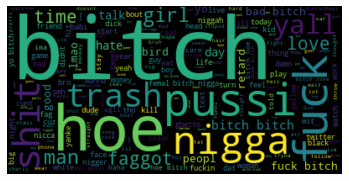

In [38]:
text=" ".join(review for review in df_cleaned.cleaned_tweet)
wordcloud = WordCloud( background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

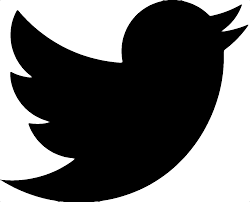

In [39]:
Image.open(r"C:\Users\User\Desktop\Project\twitter-mask.png")

In [56]:
twitter_mask=np.array(Image.open(r"C:\Users\User\Desktop\Project\twitter-mask.png"))
twitter_mask

array([[10,  1,  1, ...,  1,  1, 10],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [10,  1,  1, ...,  1,  1, 10]], dtype=uint8)

In [41]:
def transform_format(val):
    if val==1:
        return 255
    else:
        return val

In [42]:
transformed_twitter_mask=np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]),np.int32)
for i in range(len(twitter_mask)):
    transformed_twitter_mask[i]=list(map(transform_format,twitter_mask[i]))

In [55]:
transformed_twitter_mask

array([[ 10, 255, 255, ..., 255, 255,  10],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 10, 255, 255, ..., 255, 255,  10]])

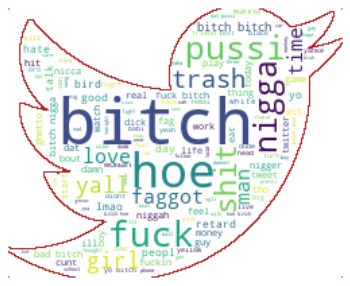

In [57]:
wc=WordCloud(background_color="white",max_words=1000,mask=transformed_twitter_mask,contour_width=1,contour_color='firebrick')
wc.generate(text)
plt.figure(figsize=[100,5])
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
df=df_cleaned
df

,class,tweet,cleaned_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous man trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad cuffin dat hoe place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg fuck bitch start confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear true faker bitch told
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthafin lie trash bibl scriptur hymn
24779,2,"you've gone and broke the wrong heart baby, an...",broke wrong heart babi drove redneck crazi
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh fuckin
24781,1,youu got wild bitches tellin you lies,wild bitch tellin lie


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), use_idf=True, smooth_idf=False, norm=None, decode_error='replace', max_features=10000, min_df=5, max_df=0.75)

In [60]:
tw=df.cleaned_tweet

In [61]:
tw

0                      woman complain clean hous man trash
1            boy dat coldtyga dwn bad cuffin dat hoe place
2                        dawg fuck bitch start confus shit
3                                                   tranni
4                          shit hear true faker bitch told
                               ...                        
24778                muthafin lie trash bibl scriptur hymn
24779           broke wrong heart babi drove redneck crazi
24780               young buck wanna eat dat nigguh fuckin
24781                                wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: cleaned_tweet, Length: 24783, dtype: object

In [62]:
vectorizer.fit_transform(tw)

<24783x5076 sparse matrix of type '<class 'numpy.float64'>'
	with 132123 stored elements in Compressed Sparse Row format>

In [63]:
vectorizer.get_feature_names()

['aap',
 'abil',
 'abo',
 'abort',
 'absolut',
 'abt',
 'abu',
 'abus',
 'accent',
 'accept',
 'accid',
 'accident',
 'account',
 'accur',
 'acknowledg',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'adam',
 'add',
 'addict',
 'address',
 'admit',
 'adopt',
 'ador',
 'adult',
 'advanc',
 'advic',
 'afford',
 'afraid',
 'african',
 'age',
 'ago',
 'ago bitch',
 'agre',
 'aha',
 'ahaha',
 'ahead',
 'ahh',
 'ahhh',
 'aid',
 'ainn',
 'air',
 'aka',
 'alabama',
 'alarm',
 'albino',
 'album',
 'alcohol',
 'alert',
 'alex',
 'alex smith',
 'alien',
 'alik',
 'aliv',
 'allah',
 'allen',
 'allstar',
 'alot',
 'alotta',
 'alpha',
 'alright',
 'alsina',
 'amanda',
 'amaz',
 'amber',
 'amber rose',
 'amend',
 'america',
 'american',
 'amo',
 'ampamp',
 'anaconda',
 'anal',
 'anchor',
 'anchor babi',
 'andi',
 'andor',
 'angel',
 'anger',
 'angri',
 'angri bird',
 'anim',
 'anim cracker',
 'ankl',
 'ann',
 'announc',
 'annoy',
 'annoy bitch',
 'anonym',
 'answer',
 'ant',
 'anthem',
 'antho

In [64]:
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())}

In [65]:
vocab

{'aap': 0,
 'abil': 1,
 'abo': 2,
 'abort': 3,
 'absolut': 4,
 'abt': 5,
 'abu': 6,
 'abus': 7,
 'accent': 8,
 'accept': 9,
 'accid': 10,
 'accident': 11,
 'account': 12,
 'accur': 13,
 'acknowledg': 14,
 'actin': 15,
 'action': 16,
 'activ': 17,
 'actor': 18,
 'actual': 19,
 'adam': 20,
 'add': 21,
 'addict': 22,
 'address': 23,
 'admit': 24,
 'adopt': 25,
 'ador': 26,
 'adult': 27,
 'advanc': 28,
 'advic': 29,
 'afford': 30,
 'afraid': 31,
 'african': 32,
 'age': 33,
 'ago': 34,
 'ago bitch': 35,
 'agre': 36,
 'aha': 37,
 'ahaha': 38,
 'ahead': 39,
 'ahh': 40,
 'ahhh': 41,
 'aid': 42,
 'ainn': 43,
 'air': 44,
 'aka': 45,
 'alabama': 46,
 'alarm': 47,
 'albino': 48,
 'album': 49,
 'alcohol': 50,
 'alert': 51,
 'alex': 52,
 'alex smith': 53,
 'alien': 54,
 'alik': 55,
 'aliv': 56,
 'allah': 57,
 'allen': 58,
 'allstar': 59,
 'alot': 60,
 'alotta': 61,
 'alpha': 62,
 'alright': 63,
 'alsina': 64,
 'amanda': 65,
 'amaz': 66,
 'amber': 67,
 'amber rose': 68,
 'amend': 69,
 'america': 70,


In [66]:
idf_vals = vectorizer.idf_

In [67]:
idf_vals

array([9.5084753 , 9.32615374, 8.02687076, ..., 9.03847167, 8.28469987,
       9.5084753 ])

In [68]:
idf_dict = {i:idf_vals[i] for i in vocab.values()}

In [69]:
idf_dict

{0: 9.508475300796515,
 1: 9.32615374400256,
 2: 8.026870759872299,
 3: 9.32615374400256,
 4: 7.822076347226286,
 5: 8.920688635894397,
 6: 9.508475300796515,
 7: 8.720017940432244,
 8: 9.172003064175302,
 9: 8.026870759872299,
 10: 8.633006563442613,
 11: 9.32615374400256,
 12: 7.562565151741201,
 13: 9.508475300796515,
 14: 9.32615374400256,
 15: 7.683926008745469,
 16: 8.073390775507193,
 17: 8.478855883615356,
 18: 9.32615374400256,
 19: 8.633006563442613,
 20: 8.920688635894397,
 21: 8.073390775507193,
 22: 8.409863012128405,
 23: 8.409863012128405,
 24: 7.899037388362414,
 25: 9.172003064175302,
 26: 8.720017940432244,
 27: 8.478855883615356,
 28: 9.508475300796515,
 29: 8.478855883615356,
 30: 8.478855883615356,
 31: 8.22754145533445,
 32: 8.409863012128405,
 33: 7.982418997301465,
 34: 7.166669494649188,
 35: 9.32615374400256,
 36: 7.859816675209133,
 37: 8.815328120236568,
 38: 9.32615374400256,
 39: 9.038471671550779,
 40: 9.508475300796515,
 41: 9.508475300796515,
 42: 8.227

In [70]:
new = vectorizer.fit_transform(tw)
featurenames = vectorizer.get_feature_names()
dense = new.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=featurenames)
df2

,aap,abil,abo,abort,absolut,abt,abu,abus,accent,accept,...,younger,youtub,yu,yuh,yung,yup,zebra,zimmerman,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
M=new.toarray()

In [72]:
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
M.shape

(24783, 5076)

In [74]:
np.count_nonzero(M)

132123

In [75]:
X = pd.DataFrame(M)
y = data['class'].astype(int)

In [76]:
X

,0,1,2,3,4,5,6,7,8,9,...,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int32

In [113]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [79]:
select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1",C=0.01,solver='liblinear'))
X_ = select.fit_transform(X,y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=42, test_size=0.1)

In [87]:
model1 = LogisticRegression(class_weight='balanced',penalty='l2',C=0.01).fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
report1 = classification_report( y_test, y_pred1 )
print(report1)

              precision    recall  f1-score   support

           0       0.32      0.76      0.45       164
           1       0.98      0.81      0.89      1905
           2       0.78      0.94      0.85       410

    accuracy                           0.83      2479
   macro avg       0.69      0.84      0.73      2479
weighted avg       0.90      0.83      0.85      2479



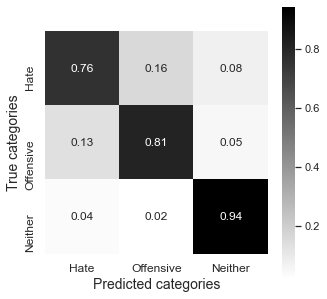

In [89]:
confusion_matrix1 = confusion_matrix(y_test,y_pred1)
matrix_proportions1 = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions1[i,:] = confusion_matrix1[i,:]/float(confusion_matrix1[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df1 = pd.DataFrame(matrix_proportions1, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df1,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

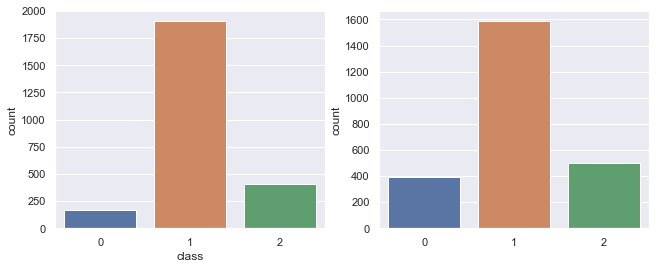

In [112]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pd.Series(y_pred1), ax=ax[1])

In [90]:
model2 = LinearSVC(class_weight='balanced',C=0.01, penalty='l2', loss='squared_hinge',multi_class='ovr').fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
report2 = classification_report( y_test, y_pred2 )
print(report2)

              precision    recall  f1-score   support

           0       0.46      0.59      0.52       164
           1       0.97      0.90      0.93      1905
           2       0.78      0.94      0.85       410

    accuracy                           0.89      2479
   macro avg       0.74      0.81      0.77      2479
weighted avg       0.90      0.89      0.89      2479



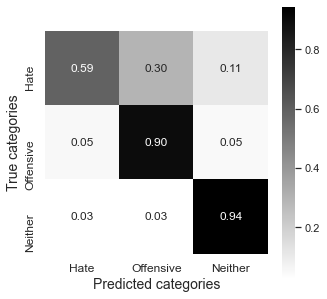

In [91]:
confusion_matrix2 = confusion_matrix(y_test,y_pred2)
matrix_proportions2 = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions2[i,:] = confusion_matrix2[i,:]/float(confusion_matrix2[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df2 = pd.DataFrame(matrix_proportions2, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df2,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

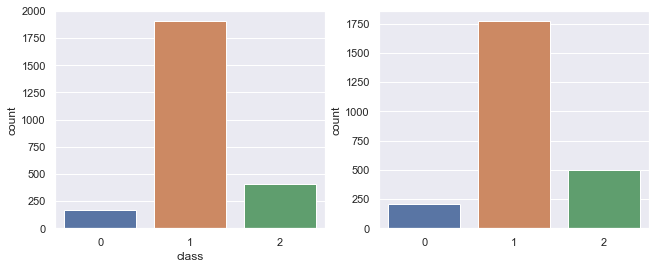

In [114]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pd.Series(y_pred2), ax=ax[1])

In [92]:
model3 = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
report3 = classification_report( y_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.34      0.55      0.42       164
           1       0.96      0.87      0.91      1905
           2       0.79      0.94      0.86       410

    accuracy                           0.86      2479
   macro avg       0.70      0.78      0.73      2479
weighted avg       0.89      0.86      0.87      2479



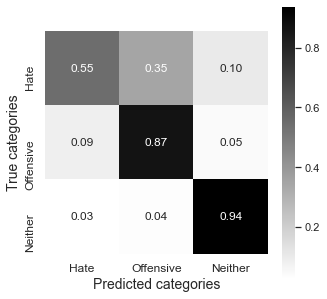

In [94]:
confusion_matrix3 = confusion_matrix(y_test,y_pred3)
matrix_proportions3 = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions3[i,:] = confusion_matrix3[i,:]/float(confusion_matrix3[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df3 = pd.DataFrame(matrix_proportions3, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df3,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

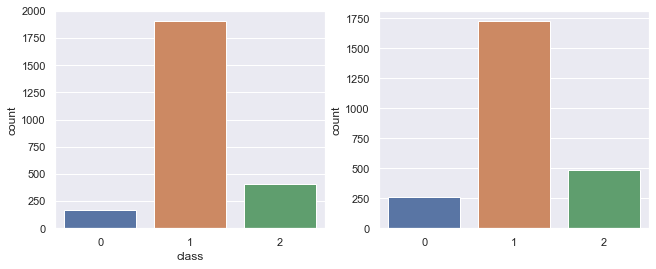

In [115]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pd.Series(y_pred3), ax=ax[1])

In [95]:
model4 = GaussianNB().fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
report4 = classification_report( y_test, y_pred4)
print(report4)

              precision    recall  f1-score   support

           0       0.28      0.68      0.39       164
           1       0.98      0.65      0.78      1905
           2       0.48      0.96      0.64       410

    accuracy                           0.70      2479
   macro avg       0.58      0.76      0.61      2479
weighted avg       0.85      0.70      0.73      2479



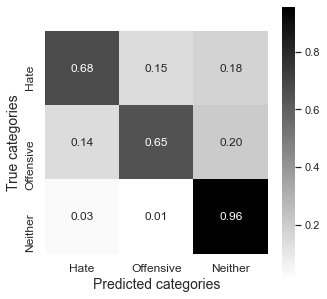

In [96]:
confusion_matrix4 = confusion_matrix(y_test,y_pred4)
matrix_proportions4 = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions4[i,:] = confusion_matrix4[i,:]/float(confusion_matrix4[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df4 = pd.DataFrame(matrix_proportions4, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df4,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

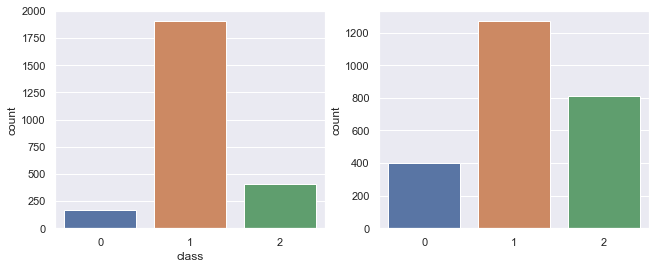

In [116]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pd.Series(y_pred4), ax=ax[1])

In [97]:
model5 = GradientBoostingClassifier().fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
report5 = classification_report( y_test, y_pred5)
print(report5)

              precision    recall  f1-score   support

           0       0.66      0.23      0.34       164
           1       0.94      0.94      0.94      1905
           2       0.76      0.96      0.85       410

    accuracy                           0.90      2479
   macro avg       0.78      0.71      0.71      2479
weighted avg       0.89      0.90      0.88      2479



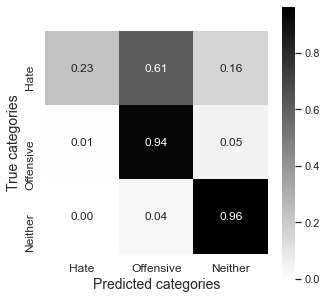

In [98]:
confusion_matrix5 = confusion_matrix(y_test,y_pred5)
matrix_proportions5 = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions5[i,:] = confusion_matrix5[i,:]/float(confusion_matrix5[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df5 = pd.DataFrame(matrix_proportions5, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df5,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

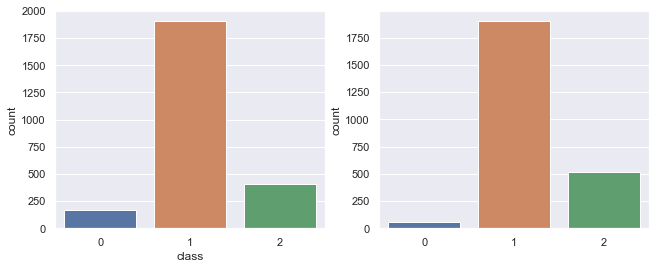

In [117]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pd.Series(y_pred5), ax=ax[1])

In [99]:
model6 = MLPClassifier().fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
report6 = classification_report( y_test, y_pred6)
print(report6)

              precision    recall  f1-score   support

           0       0.53      0.35      0.42       164
           1       0.94      0.93      0.94      1905
           2       0.79      0.92      0.85       410

    accuracy                           0.89      2479
   macro avg       0.75      0.73      0.74      2479
weighted avg       0.89      0.89      0.89      2479



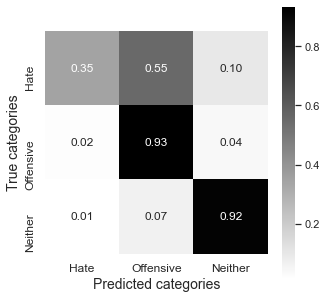

In [100]:
confusion_matrix6 = confusion_matrix(y_test,y_pred6)
matrix_proportions6 = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions6[i,:] = confusion_matrix6[i,:]/float(confusion_matrix6[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df6 = pd.DataFrame(matrix_proportions6, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df6,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

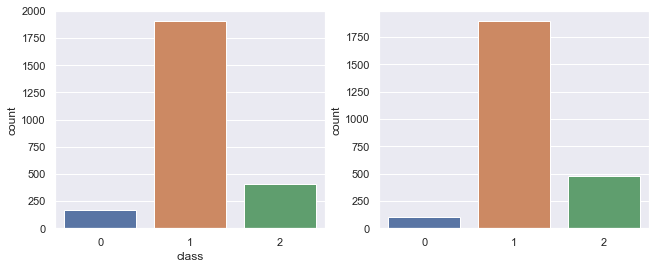

In [118]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pd.Series(y_pred6), ax=ax[1])

In [119]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 19190, 2: 4163, 0: 1430})


In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
sm = SMOTE(random_state=42)

In [122]:
X_res, y_res = sm.fit_resample(X, y)

In [123]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 19190, 1: 19190, 0: 19190})


In [124]:
select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1",C=0.01,solver='liblinear'))
SX_ = select.fit_transform(X_res,y_res)

In [125]:
SX_train, SX_test, Sy_train, Sy_test = train_test_split(SX_, y_res, random_state=42, test_size=0.1)

In [126]:
Smodel1 = LogisticRegression(class_weight='balanced',penalty='l2',C=0.01).fit(SX_train,Sy_train)
Sy_pred1 = Smodel1.predict(SX_test)
Sreport1 = classification_report( Sy_test, Sy_pred1 )
print(Sreport1)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1913
           1       0.82      0.83      0.83      1913
           2       0.87      0.96      0.92      1931

    accuracy                           0.85      5757
   macro avg       0.85      0.85      0.84      5757
weighted avg       0.85      0.85      0.84      5757



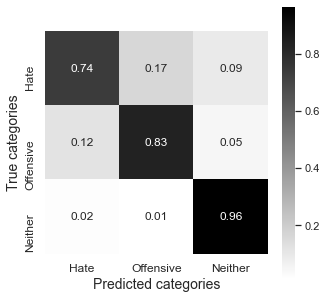

In [127]:
Sconfusion_matrix1 = confusion_matrix(Sy_test,Sy_pred1)
Smatrix_proportions1 = np.zeros((3,3))
for i in range(0,3):
    Smatrix_proportions1[i,:] = Sconfusion_matrix1[i,:]/float(Sconfusion_matrix1[i,:].sum())
names=['Hate','Offensive','Neither']
Sconfusion_df1 = pd.DataFrame(Smatrix_proportions1, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(Sconfusion_df1,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

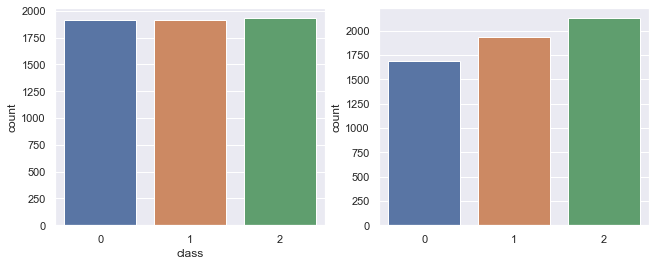

In [128]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(Sy_test, ax=ax[0])
sns.countplot(pd.Series(Sy_pred1), ax=ax[1])

In [129]:
Smodel2 = LinearSVC(class_weight='balanced',C=0.01, penalty='l2', loss='squared_hinge',multi_class='ovr').fit(SX_train, Sy_train)
Sy_pred2 = Smodel2.predict(SX_test)
Sreport2 = classification_report( Sy_test, Sy_pred2 )
print(Sreport2)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1913
           1       0.81      0.84      0.83      1913
           2       0.87      0.96      0.91      1931

    accuracy                           0.84      5757
   macro avg       0.84      0.84      0.84      5757
weighted avg       0.84      0.84      0.84      5757



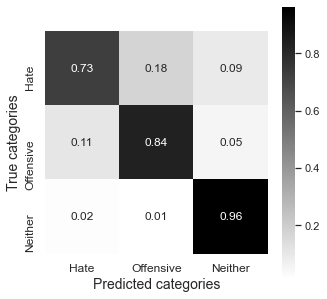

In [130]:
Sconfusion_matrix2 = confusion_matrix(Sy_test,Sy_pred2)
Smatrix_proportions2 = np.zeros((3,3))
for i in range(0,3):
    Smatrix_proportions2[i,:] = Sconfusion_matrix2[i,:]/float(Sconfusion_matrix2[i,:].sum())
names=['Hate','Offensive','Neither']
Sconfusion_df2 = pd.DataFrame(Smatrix_proportions2, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(Sconfusion_df2,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

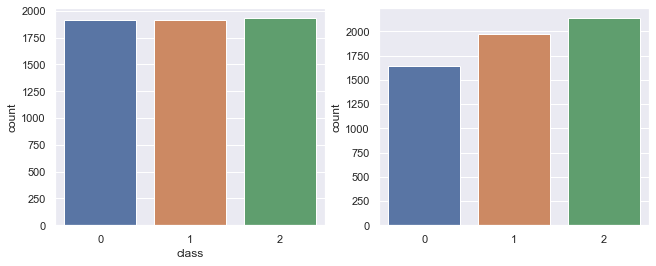

In [131]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(Sy_test, ax=ax[0])
sns.countplot(pd.Series(Sy_pred2), ax=ax[1])

In [132]:
Smodel3 = RandomForestClassifier(class_weight='balanced').fit(SX_train, Sy_train)
Sy_pred3 = Smodel3.predict(SX_test)
Sreport3 = classification_report( Sy_test, Sy_pred3)
print(Sreport3)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1913
           1       0.94      0.91      0.92      1913
           2       0.93      0.96      0.95      1931

    accuracy                           0.93      5757
   macro avg       0.93      0.93      0.93      5757
weighted avg       0.93      0.93      0.93      5757



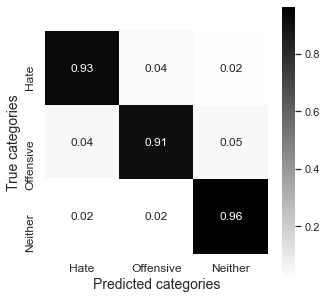

In [133]:
Sconfusion_matrix3 = confusion_matrix(Sy_test,Sy_pred3)
Smatrix_proportions3 = np.zeros((3,3))
for i in range(0,3):
    Smatrix_proportions3[i,:] = Sconfusion_matrix3[i,:]/float(Sconfusion_matrix3[i,:].sum())
names=['Hate','Offensive','Neither']
Sconfusion_df3 = pd.DataFrame(Smatrix_proportions3, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(Sconfusion_df3,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

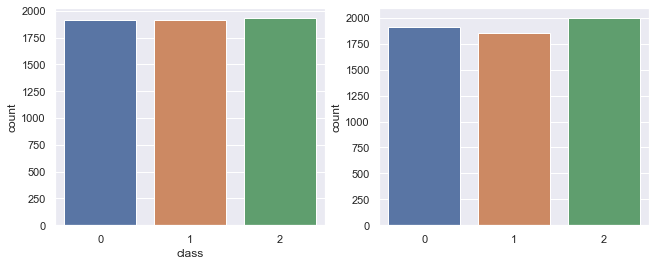

In [134]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(Sy_test, ax=ax[0])
sns.countplot(pd.Series(Sy_pred3), ax=ax[1])

In [135]:
Smodel4 = GaussianNB().fit(SX_train, Sy_train)
Sy_pred4 = Smodel4.predict(SX_test)
Sreport4 = classification_report( Sy_test, Sy_pred4)
print(Sreport4)

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      1913
           1       0.87      0.27      0.41      1913
           2       0.79      0.96      0.86      1931

    accuracy                           0.70      5757
   macro avg       0.75      0.70      0.66      5757
weighted avg       0.75      0.70      0.66      5757



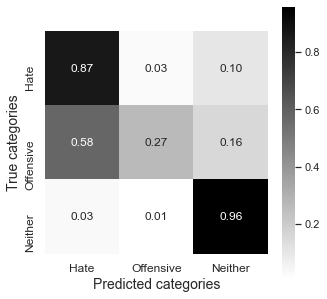

In [136]:
Sconfusion_matrix4 = confusion_matrix(Sy_test,Sy_pred4)
Smatrix_proportions4 = np.zeros((3,3))
for i in range(0,3):
    Smatrix_proportions4[i,:] = Sconfusion_matrix4[i,:]/float(Sconfusion_matrix4[i,:].sum())
names=['Hate','Offensive','Neither']
Sconfusion_df4 = pd.DataFrame(Smatrix_proportions4, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(Sconfusion_df4,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

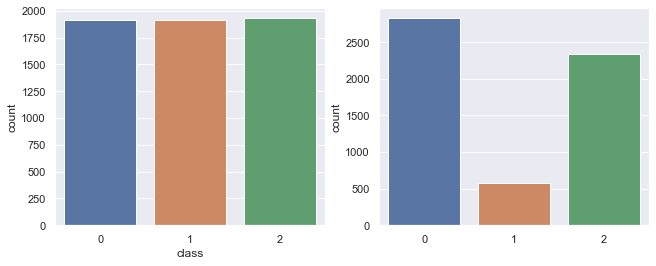

In [137]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(Sy_test, ax=ax[0])
sns.countplot(pd.Series(Sy_pred4), ax=ax[1])

In [138]:
Smodel5 = GradientBoostingClassifier().fit(SX_train, Sy_train)
Sy_pred5 = Smodel5.predict(SX_test)
Sreport5 = classification_report( Sy_test, Sy_pred5)
print(Sreport5)

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1913
           1       0.90      0.87      0.89      1913
           2       0.86      0.97      0.91      1931

    accuracy                           0.89      5757
   macro avg       0.89      0.89      0.89      5757
weighted avg       0.89      0.89      0.89      5757



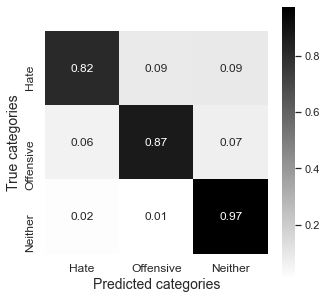

In [139]:
Sconfusion_matrix5 = confusion_matrix(Sy_test,Sy_pred5)
Smatrix_proportions5 = np.zeros((3,3))
for i in range(0,3):
    Smatrix_proportions5[i,:] = Sconfusion_matrix5[i,:]/float(Sconfusion_matrix5[i,:].sum())
names=['Hate','Offensive','Neither']
Sconfusion_df5 = pd.DataFrame(Smatrix_proportions5, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(Sconfusion_df5,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

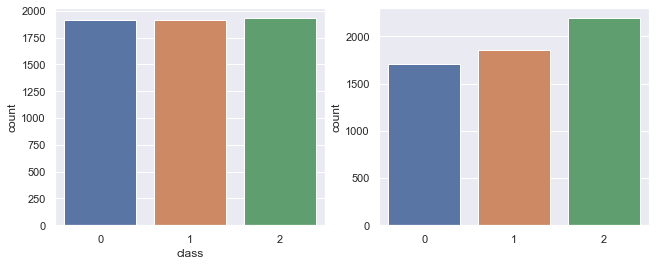

In [140]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(Sy_test, ax=ax[0])
sns.countplot(pd.Series(Sy_pred5), ax=ax[1])

In [141]:
Smodel6 = MLPClassifier().fit(SX_train, Sy_train)
Sy_pred6 = Smodel6.predict(SX_test)
Sreport6 = classification_report( Sy_test, Sy_pred6)
print(Sreport6)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1913
           1       0.95      0.90      0.93      1913
           2       0.94      0.97      0.95      1931

    accuracy                           0.94      5757
   macro avg       0.94      0.94      0.94      5757
weighted avg       0.94      0.94      0.94      5757



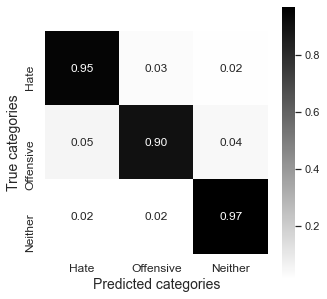

In [142]:
Sconfusion_matrix6 = confusion_matrix(Sy_test,Sy_pred6)
Smatrix_proportions6 = np.zeros((3,3))
for i in range(0,3):
    Smatrix_proportions6[i,:] = Sconfusion_matrix6[i,:]/float(Sconfusion_matrix6[i,:].sum())
names=['Hate','Offensive','Neither']
Sconfusion_df6 = pd.DataFrame(Smatrix_proportions6, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(Sconfusion_df6,cmap='gist_gray_r',cbar=True, square=True,fmt='.2f',annot=True,annot_kws={"size": 12})
plt.ylabel('True categories',fontsize=14)
plt.xlabel('Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

<AxesSubplot:ylabel='count'>

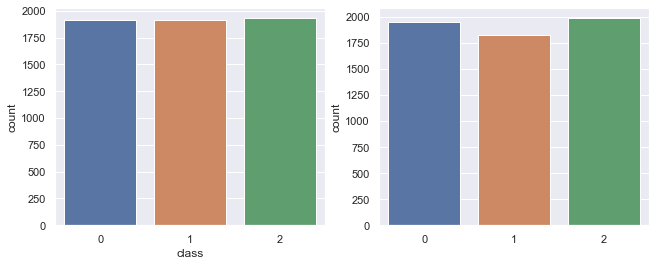

In [143]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(right=1.5)
sns.countplot(Sy_test, ax=ax[0])
sns.countplot(pd.Series(Sy_pred6), ax=ax[1])